In [60]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [4]:
iris = load_iris()

In [6]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [7]:
iris.keys()

dict_keys(['feature_names', 'DESCR', 'target_names', 'target', 'data'])

In [8]:
print (iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [19]:
df_x = pd.DataFrame(iris.data, columns=iris.feature_names)
df_y = pd.DataFrame(iris.target)
df_t = pd.DataFrame(iris.data, columns=iris.feature_names)
df_t['Label'] = iris.target
df_x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
df_y.columns =  ['Targets']

In [20]:
df_x.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
df_x.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
df_t.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


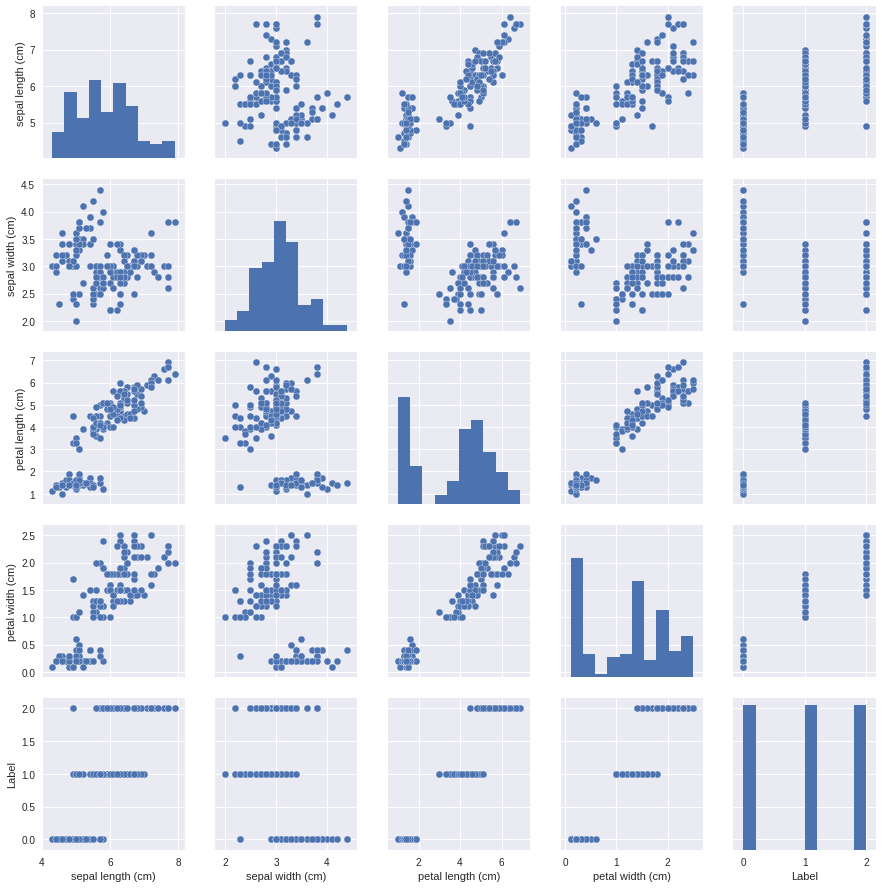

In [13]:
sb = sns.pairplot(df_t)

In [107]:
kmeans = KMeans(n_clusters=3)

In [108]:
KMmodel = kmeans.fit(df_x)

In [109]:
KMmodel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [110]:
KMmodel.cluster_centers_

array([[ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]])

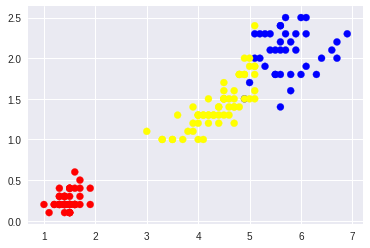

In [111]:
colormap = np.array(['Red', 'Blue', 'Yellow'])
plt.scatter(df_x.Petal_Length, df_x.Petal_Width, c=colormap[KMmodel.labels_])

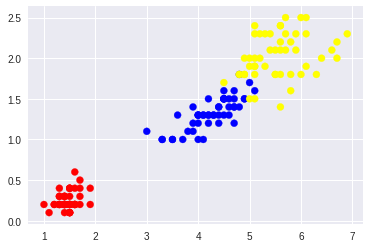

In [112]:
colormap = np.array(['Red', 'Blue', 'Yellow'])
plt.scatter(df_x.Petal_Length, df_x.Petal_Width, c=colormap[df_y.Targets])

In [113]:
pd.crosstab(df_y.Targets, KMmodel.labels_)

col_0,0,1,2
Targets,,,
0,50,0,0
1,0,2,48
2,0,36,14


In [114]:
relabel = np.choose(KMmodel.labels_, [0,2,1])
print (classification_report(df_y.Targets, relabel))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.77      0.96      0.86        50
          2       0.95      0.72      0.82        50

avg / total       0.91      0.89      0.89       150

